# Sección 1- Presentación del problema específico

El dataset seleccionado corresponde a una empresa internacional de comercio electrónico. La misma vende productos electrónicos y quiere descubrir información clave de su base de datos de clientes como el modo de envío, On Time, numero de llamadas realizadas por consulta, calificación del cliente, costo de producto, etc. Cada persona tiene una condición diferente, que puede llevarlos a elegir la empresa para su próxima compra u optar por un competidor, dependiendo que variable puede ser de mayor peso para su decisión.

El problema es que hay una serie de variables que pueden influir en que una persona decida recomendar la empresa para estos productos o no; pero no se sabe si sólo afecta una variable o es una combinación de varias.

# Sección 2 - Preguntas y objetivos de la investigación.

Preguntas Generales:
¿Qué porcentaje de clientes eligen productos de alta importancia?
¿Como es la distribución de descuentos otorgados de los registros relevados? es normal? Tiene algún sesgo?
¿Los clientes de alta importancia, son los de mayor cantidad de llamadas de atanción? Pertenecen a un almacén específico o se conecntran en un grupo de almacenes?
¿Es el precio del producto un factor clave para la calificacion de la importancia del producto? ¿El medio de transporte?
¿De cuánto es el On Time promedio de cada medio de transporte por importancia de producto y por peso?
¿Qué género de clientes es el mas preponderante en la compra de productos?
¿Cual es el costo promedio de los productos en función del rating de cliente?
Hay 4 variables relacionadas con la satisfacción del cliente (On Time, precio, descuento, Customer rating y importancia del producto) . ¿Estas variables guardan alguna relación?
¿Cuál es el rango de precios en los productos?
¿A mayor cantidad de importancia del producto, mayor es el precio? ¿A mayor peso y tipo de envio se incrementa el precio?
¿Muchas personas hacen horas extra?
Pregunta Objetivo:
En base a todas las variables pesentadas en el dataset descubrir: ¿Cuales son las razones que generan una mejor califiación del cliente razón que puede llevar a una mejora en las ventas de los productos?

En base a esta pregunta objetivo, identificar la minima cantidad de variables que lo determinan con el fin de que se pueda mitigar y accionar sobre casos de posible descalificación y que la empresa pueda enfocar sus recursos en las variables que realmente impactan en la calificación del cliente.

# Sección 3 - Data Acquisition

Este es un conjunto de datos ficticios creado por científicos de datos. Ha sido descargado del sitio Kaggle, el cual posee una gran variedad de datasets y otros contenidos. Se puede acceder al dataset en este Link:

https://www.kaggle.com/datasets/prachi13/customer-analytics

Es un dataset público. El usuario que cargó el dataset es: PRACHI GOPALANI.

El criterio utilizado para usar este dataset es que :

Es un tema vinculado a la empresa donde trabaja el autor del proyecto actualmente, y son datos familiarizados, por lo tanto podemos tener un buen nivel de conocimiento.
Cuenta con una amplia variedad de variables a analizar.
Es información de interés, ya que las variables allí incluidas pudieran afectar de forma similar a otras empresas.
A simple vista, pareciera que los datos están completos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
datos.to_csv("C:/Users/tomas/Train.csv")

Mounted at /content/drive


# Contenido

El conjunto de datos utilizado para la construcción del modelo contenía 10999 observaciones de 12 variables.
Los datos contienen la siguiente información:



*   ID: Número de ID de los Clientes.
*   Bloque de almacén: la empresa tiene un gran almacén que se divide en bloques como A, B, C, D, E.
*   Modo de envío: la empresa envía los productos de varias maneras, como barco, vuelo y carretera.
*   Llamadas de atención al cliente: Número de llamadas realizadas a partir de consulta por consulta del envío.
*   Calificación del cliente: La empresa ha calificado a cada cliente. 1 es el más bajo (peor), 5 es el más alto (mejor).
*   Costo del producto: Costo del Producto en dólares estadounidenses.
*   Compras anteriores: El Número de Compras Previas.
*   Importancia del producto: la empresa ha categorizado el producto en varios parámetros, como bajo, medio, alto.
*   Género: Masculino y Femenino.
*   Descuento ofrecido: Descuento ofrecido en ese producto específico.
*   Peso en gms: Es el peso en gramos.
*   Llegó a tiempo: Es la variable objetivo, donde 1 Indica que el producto NO ha llegado a tiempo y 0 indica que ha llegado a tiempo.

# Sección 4 - Importación de librerias

In [5]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)


In [12]:
# Tratamiento de datos
# ==============================================================================
import numpy as np                    # Importar Numpy
import pandas as pd                   # Importar Pandas
import scipy as sp

pd.options.display.max_rows = 5       # Configuracion pandas
from prettytable import PrettyTable

# Gráficos
# ==============================================================================
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt       # El modulo Pyplot de Matplotlib
import seaborn as sns                 # Importar Seaborn
import plotly.express as px

mpl.style.use('bmh')    # Establecemos un nuevo estilo

#import probscale
#import matplotlib.font_manager
#from matplotlib import style

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import scale
from sklearn import preprocessing  # Import label encoder
from sklearn.model_selection import train_test_split #para separar en train y test
# Modelos de Clasificacion:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# REGRESCIÓN LOGISTICA
from sklearn.linear_model import LogisticRegression
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# ARBOL DEL DECISION
from sklearn.tree import DecisionTreeClassifier 
# XGBOOST


# Métricas
# ==============================================================================
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import json
import pickle

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeRegressor

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as lr
import sklearn.metrics as metrics

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas                  as pd
from   scipy import stats
import scipy as sp
pd.options.display.max_rows = 5    
                                        # Configuracion pandas
from prettytable import PrettyTable
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os
#%matplotlib inline
#plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib



import pingouin


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as metrics

# Librerías para importar/exportar el modelo
import json
import pickle

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE

In [3]:
>>> import dabl
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.datasets import load_digits
import ppscore as pps

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [5]:
import scipy
from scipy import stats
import sklearn.metrics as metrics

# 4.2 - Dataset

In [6]:


df_ecommerce=pd.read_csv("C:/Users/tomas/Train.csv")
df_ecommerce.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [8]:
df_ecommerce.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Sección 5 - EDA (análisis univariado, bivariado y multivariado)

In [8]:
# Genero una función que realiza una tabla resumen de los campos del dataframe

def df_explore(df_ecommerce):
    #Description table of the main characteristics of each column from a dataset
    print( 'Shape: ', df_ecommerce.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df_ecommerce.columns:
        t.add_row([c,
                   df_ecommerce[c].dtype,
                   len(df_ecommerce[c])-np.sum(df_ecommerce[c].isna()),
                   np.sum(df_ecommerce[c].isna()),
                   np.count_nonzero(df_ecommerce[c].unique()),
                   df_ecommerce[~df_ecommerce[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(df_ecommerce)

Shape:  (10999, 12)
+---------------------+--------+----------+-------+--------+---------+
|        Column       |  Type  | Non-Null | Nulls | Unique | Example |
+---------------------+--------+----------+-------+--------+---------+
|          ID         | int64  |  10999   |   0   | 10999  |    1    |
|   Warehouse_block   | object |  10999   |   0   |   5    |    D    |
|   Mode_of_Shipment  | object |  10999   |   0   |   3    |  Flight |
| Customer_care_calls | int64  |  10999   |   0   |   6    |    4    |
|   Customer_rating   | int64  |  10999   |   0   |   5    |    2    |
| Cost_of_the_Product | int64  |  10999   |   0   |  215   |   177   |
|   Prior_purchases   | int64  |  10999   |   0   |   8    |    3    |
|  Product_importance | object |  10999   |   0   |   3    |   low   |
|        Gender       | object |  10999   |   0   |   2    |    F    |
|   Discount_offered  | int64  |  10999   |   0   |   65   |    44   |
|    Weight_in_gms    | int64  |  10999   |   0   |  4034

OBS: No hay valores nulos

Verifiquemos si hay lineas duplicadas:

In [9]:
df_ecommerce.duplicated().any()

False

In [8]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
print(df_ecommerce.shape)
df_ecommerce= df_ecommerce.drop_duplicates()
print(df_ecommerce.shape)

(10999, 12)
(10999, 12)


In [11]:
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_ecommerce.isnull().sum()/df_ecommerce.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

OBS: No hay lineas duplicadas

# 5.1 - Verifico los valores únicos de las variables de tipo object

In [12]:
def df_unique_val_col(df_ecommerce, col_list = [] ):
    
    #Cuento la máxima cantidad de valores unicos que tienen los campos
    cant_table_col = 0
    for i in col_list:
        l = len(df_ecommerce[i].unique())
        if cant_table_col < l:
            cant_table_col = l
    
    # Creo la lista de campos "value_x" para armar el indice y definir el tamaño de la tabla (alto)
    A = []
    for i in range(cant_table_col):
        A.append('Value : '+str(i))
    
    #creo un dataframe vacio
    dg = pd.DataFrame(index = A,
                          columns = df_ecommerce[col_list].columns)    

    #Completo el dataframe con los valores unicos sino lo lleno con '-'
    for m in df_ecommerce[col_list]:
        uni = df_ecommerce[m].unique()
        le = len(uni)
        
        for j in range(cant_table_col):
            if j < le:
                dg[m][j] = uni[j]
            else:
                dg[m][j] = '-'

    print('Valores únicos de algunos campos de interes')
    return dg

In [13]:
# Variables de tipo object:
L = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']


# 5.2 - Estadísticas descriptivas

In [14]:
df_ecommerce.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.00,3175.28,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.05,1.14,2.0,3.0,4.0,5.0,7.0
...,...,...,...,...,...,...,...,...
Reached.on.Time_Y.N,10999.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0
Train,10999.0,0.70,0.46,0.0,0.0,1.0,1.0,1.0


# 5.3 - Análisis Univariado
## Analizo distribuciones y participaciones
### VARIABLES SOLO VARIABLES NUMERICAS

Omitimos la variables ID, ya que no es de nuestro interesy Reached On Time, ya que es una variable booleana en el que el valor 1 es Yes y el valor 0 es No.

Las siguientes son las variables numericas del dataset, sin embargo, algunas son de tipo ordinales y no cuantitativas, por lo que conviene ver solo las distribuciones de las numericas y analizar por separado las categóricas

In [15]:
#Podemos usar un poco de código para visualizar más de una variable a la vez
# VARIABLES SOLO VARIABLES NUMERICAS
# Salvo 'EmployeeCount' y 'EmployeeNumber'   

# Las siguientes son las variables numericas del dataset, sin embargo, algunas son de tipo ordinales:
INT_variables = ['Customer_care_calls','Customer_rating', 'Cost_of_the_Product',
                 'Prior_purchases','Discount_offered','Weight_in_gms']  

Num_variables = ['Customer_care_calls', 'Cost_of_the_Product', 'Discount_offered','Weight_in_gms' ]

Num_OnTime_var = Num_variables.copy()
Num_OnTime_var.append('Reached.on.Time_Y.N')

Num_Gen_var = Num_variables.copy()
Num_Gen_var.append('Gender')
print(len(Num_variables))

Num_shipment_var = Num_variables.copy()
Num_shipment_var.append('Mode_of_Shipment')

4


# 5.3.1 - Análisis Univariado (Análisis General de Variables)
## 5.3.1.1 - Análisis Univariado (ANALIZAMOS EL COMPORTAMIENTO DE LAS VARIABLES INDIVIDUALMENTE)

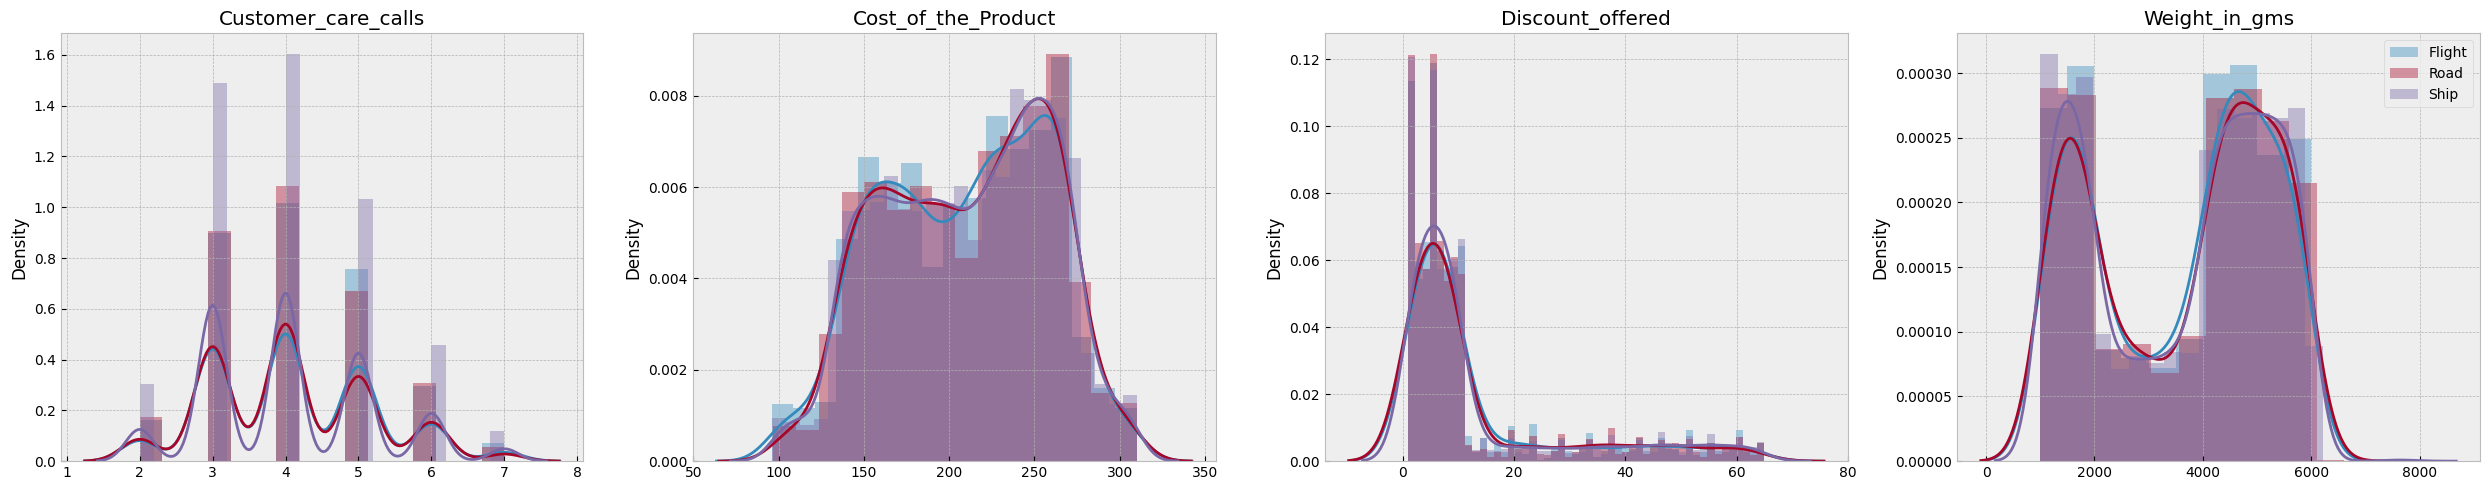

In [16]:
columns = 4
fig, axes = plt.subplots(1, len(Num_variables), squeeze=False, figsize=(25,5))

Flight = df_ecommerce[df_ecommerce['Mode_of_Shipment']=='Flight']
Road = df_ecommerce[df_ecommerce['Mode_of_Shipment']=='Road']
Ship = df_ecommerce[df_ecommerce['Mode_of_Shipment']=='Ship']

for current_idx, variable in enumerate(Num_variables):
    
    i = current_idx // columns # Filas
    j = current_idx % columns  # Columnas

    sns.distplot(Flight[variable],label= 'Flight', ax=axes[i][j])
    sns.distplot(Road[variable],label= 'Road', ax=axes[i][j])
    sns.distplot(Ship[variable],label= 'Ship', ax=axes[i][j])

    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()
plt.legend()
plt.show()

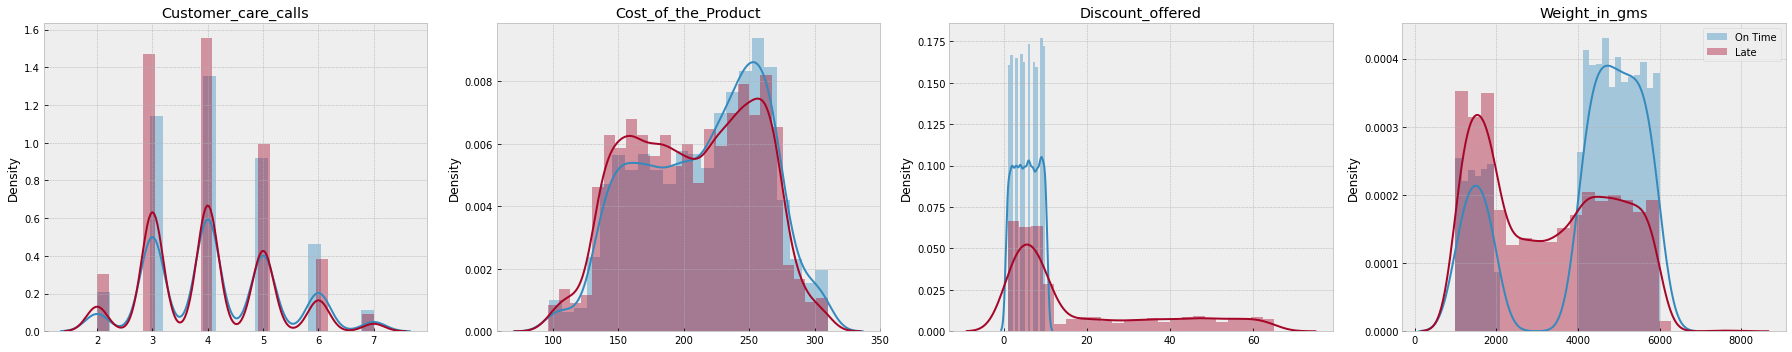

In [ ]:
columns = 4
fig, axes = plt.subplots(1, len(Num_variables), squeeze=False, figsize=(25,5))

On_Time = df_ecommerce[df_ecommerce['Reached.on.Time_Y.N']==0]
Late = df_ecommerce[df_ecommerce['Reached.on.Time_Y.N']==1]

for current_idx, variable in enumerate(Num_variables):
    
    i = current_idx // columns # Filas
    j = current_idx % columns  # Columnas

    sns.distplot(On_Time[variable],label= 'On Time', ax=axes[i][j])
    sns.distplot(Late[variable],label= 'Late', ax=axes[i][j])

    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()
plt.legend()
plt.show()

NameError: name 'On_Time' is not defined

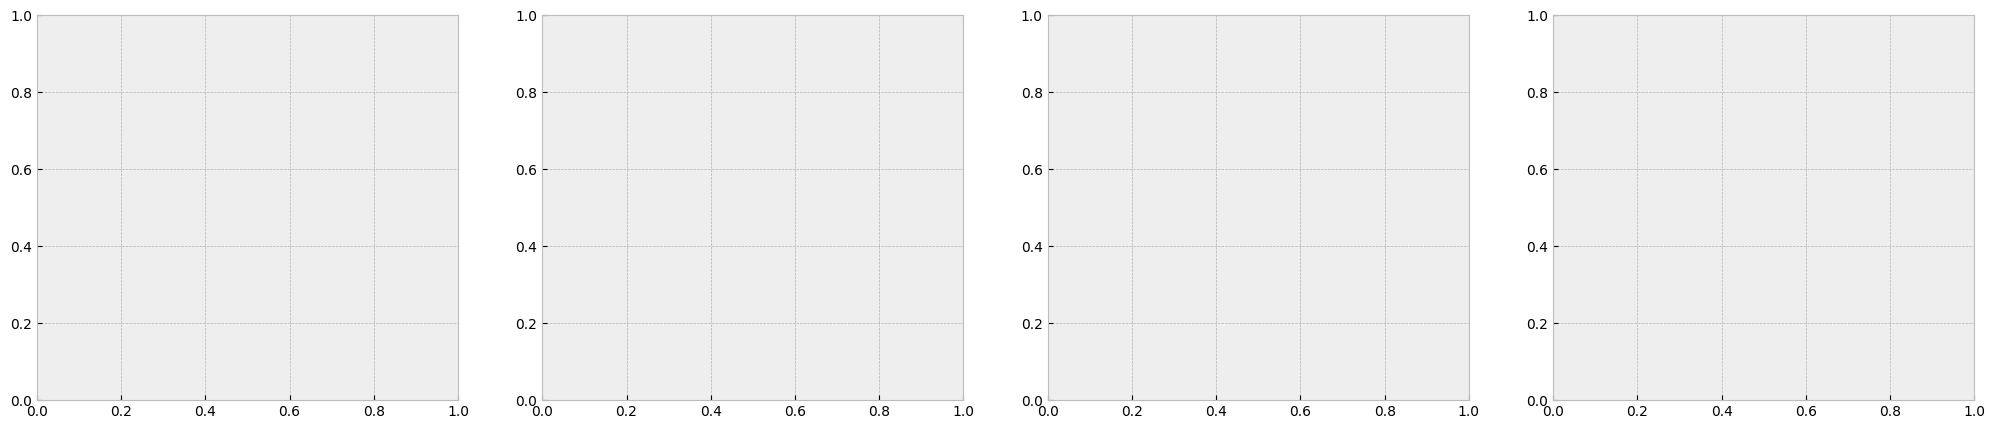

In [15]:
columns = 4
fig, axes = plt.subplots(1, len(Num_variables), squeeze=False, figsize=(25,5))

M = df_ecommerce[df_ecommerce['Gender']=='M']
F = df_ecommerce[df_ecommerce['Gender']=='F']

for current_idx, variable in enumerate(Num_variables):
    
    i = current_idx // columns # Filas
    j = current_idx % columns  # Columnas

    sns.distplot(On_Time[variable],label= 'M', ax=axes[i][j])
    sns.distplot(Late[variable],label= 'F', ax=axes[i][j])

    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()
plt.legend()
plt.show()

## 5.3.1.2 - Análisis Univariado (ANALIZAMOS EL COMPORTAMIENTO DE LAS VARIABLES INDIVIDUALMENTE CON BOXPLOTS )

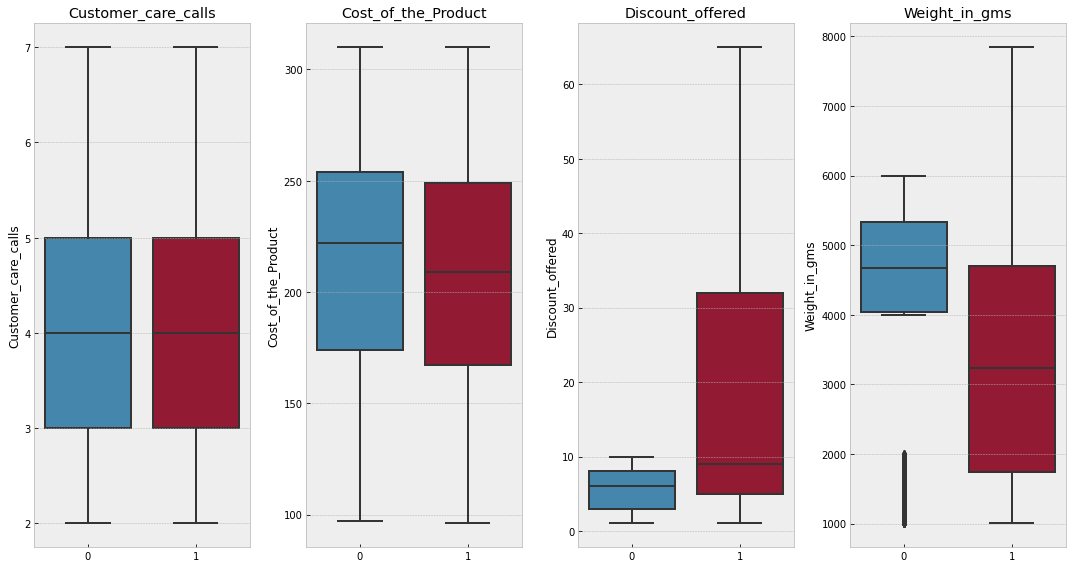

In [ ]:
columns = 4

fig, axes = plt.subplots(1, len(Num_variables), squeeze=False, figsize=(15,8))

for current_idx, variable in enumerate(Num_variables):
    
    i = current_idx // columns # Filas
    j = current_idx % columns  # Columnas
    
    sns.boxplot(y=df_ecommerce[variable], x = df_ecommerce['Reached.on.Time_Y.N'], orient = 'v', ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()

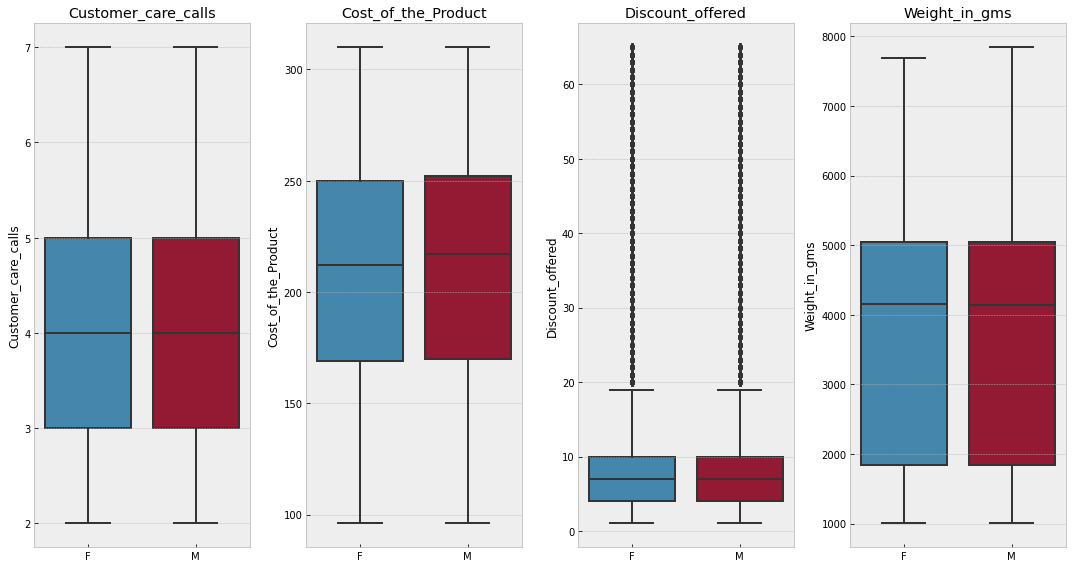

In [ ]:
columns = 4

fig, axes = plt.subplots(1, len(Num_variables), squeeze=False, figsize=(15,8))

for current_idx, variable in enumerate(Num_variables):
    
    i = current_idx // columns # Filas
    j = current_idx % columns  # Columnas
    
    sns.boxplot(y=df_ecommerce[variable], x = df_ecommerce['Gender'], orient = 'v', ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()

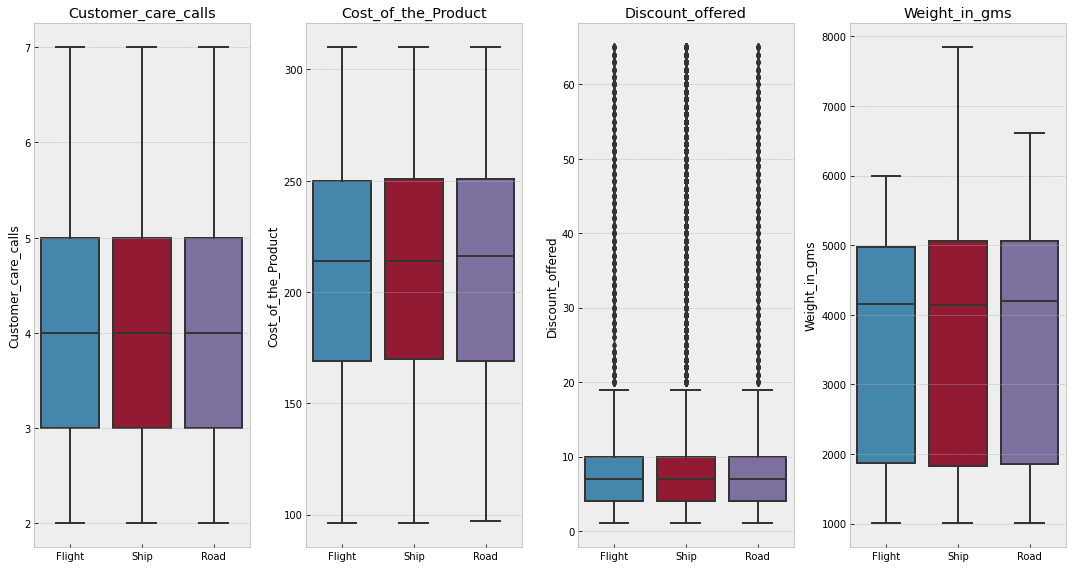

In [ ]:
columns = 4

fig, axes = plt.subplots(1, len(Num_variables), squeeze=False, figsize=(15,8))

for current_idx, variable in enumerate(Num_variables):
    
    i = current_idx // columns # Filas
    j = current_idx % columns  # Columnas
    
    sns.boxplot(y=df_ecommerce[variable], x = df_ecommerce['Mode_of_Shipment'], orient = 'v', ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()

Comentarios:
1) Customer care calls: Se observa que se realiza mayor cantidad de llamados por pedidos que no llegan a tiempo y aparecen mas frecuencia los que son enviados por barco.

2) Cost of the product: Se observan distribuciones similares de costo de producto y no parece variar por el medio de transporte, el genero o la condicion final de llegada del producto. Un leve sesgo de mayor costo a los pedidos a tiempo.

3) Discount offered: Se muestra una clara distribucion hacia mayores descuentos en pedidos tarde, lo cual es bastante logico como compensacion al cliente.

4) Weight in grs: Se observan outliers mas preponderantes en el nevio por barco por lo cual hay productos mas pesados en este medio. Tambien se detencta que los productos tardios suelen tener dispersiones mucho mas marcadas en cuanto al peso del producto.



Outliers:

Se considera que estos outliers no se deben a errores de tipeo en el archivo, sino a situaciones particulares de estas variables, donde hay valores que no son tan comunes.

## 5.3.2 - Análisis Univariado (Gráficos de distintas variables para comprender mejor los datos)

In [ ]:
def column_exploration(df_ecommerce,column_name,sort_index=False):
    #Analysis of column values and plot
    print(f'COLUMN: {column_name}')

    # Quantity and Percentage of orders
    #print('\n\na. Quantity and Percentage \n')
    abs_values =df_ecommerce[column_name].value_counts()
    prc_values =(df_ecommerce[column_name].value_counts(normalize=True)*100).apply(lambda x:round(x,1))
    df_values = pd.merge(abs_values, prc_values, left_index=True, right_index=True, suffixes=('_abs','_prc'))
    #display(df_values)
    
#     abs_values = pd.DataFrame(df[[column_name, 'Gender']].value_counts()).pivot_table(index = [column_name], columns = 'Gender').reset_index()
#     abs_values= abs_values.set_index(column_name)
#     abs_values.columns.set_levels([column_name+'_abs'],level=0,inplace=True)
#     #display(abs_values)
    
#     prc_values = pd.DataFrame(df[[column_name, 'Gender']].value_counts(normalize=True)*100).apply(lambda x:round(x,1)).pivot_table(index = [column_name], columns = 'Gender').reset_index()
#     prc_values= prc_values.set_index(column_name)
#     prc_values.columns.set_levels([column_name+'_prc'],level=0,inplace=True)
    #display(prc_values)   
    

    #table.plot(kind='bar', stacked=True, color=['red','steelblue'])

    # Plot of orders
    #print('\n\nb. Plot of quantity\n')
    
    if sort_index is True:
        df_values = df_values.sort_index(axis = 0)
       # abs_values = abs_values.sort_index(axis = 0)
       # prc_values = prc_values.sort_index(axis = 0)
    
    # Plot values, title and axis names
    ax = df_values[column_name+'_abs'].plot(kind='bar', figsize=(12,6))
    #ax = abs_values.plot(kind='bar', stacked=True, color=['red','steelblue'], figsize=(12,6))
    ax.set_title(f"Number of orders by {column_name}")
    ax.set_xlabel(column_name)
    ax.set_ylabel('Number of orders')

    #Labels over bars
    rects = ax.patches
    labels = [f'{p}%' for p in df_values[column_name+'_prc'].to_list()]    
    #labels = [f'{p}%' for p in prc_values.unstack().to_list()]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2 , height + 1, label,
                ha='center', va='bottom')
    
    return 

COLUMN: Gender


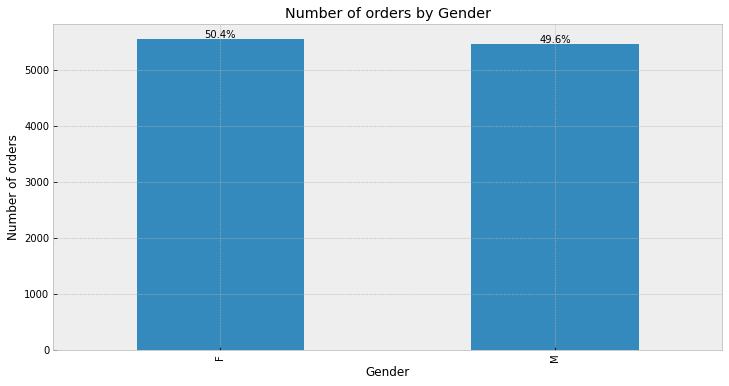

In [ ]:
column_exploration(df_ecommerce,'Gender')

COLUMN: Mode_of_Shipment


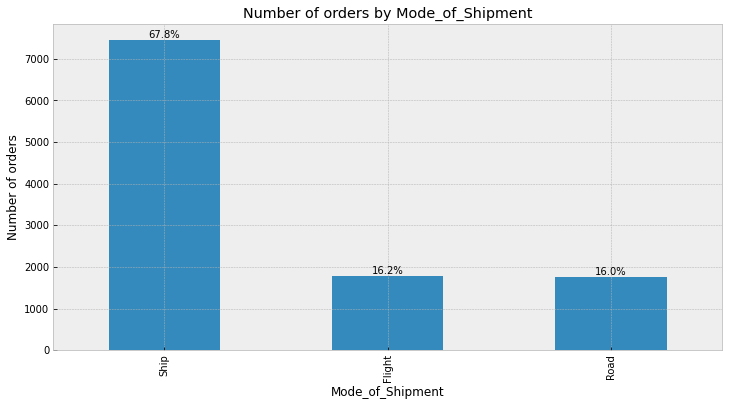

In [ ]:
column_exploration(df_ecommerce,'Mode_of_Shipment')

COLUMN: Warehouse_block


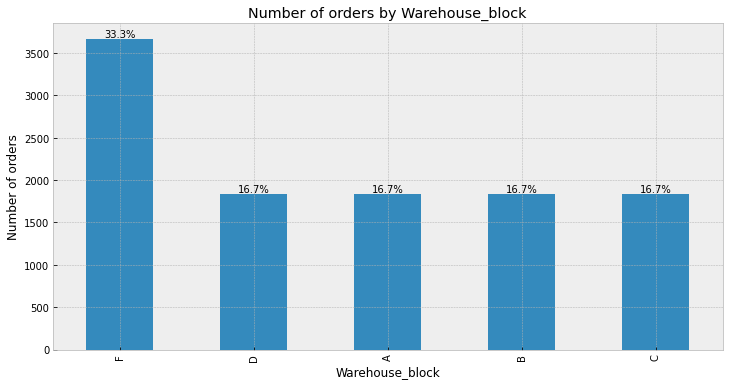

In [ ]:
column_exploration(df_ecommerce,'Warehouse_block')

COLUMN: Customer_rating


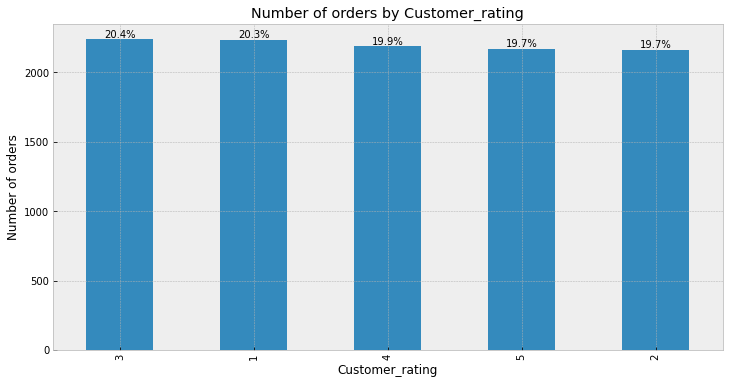

In [ ]:
column_exploration(df_ecommerce,'Customer_rating')

COLUMN: Prior_purchases


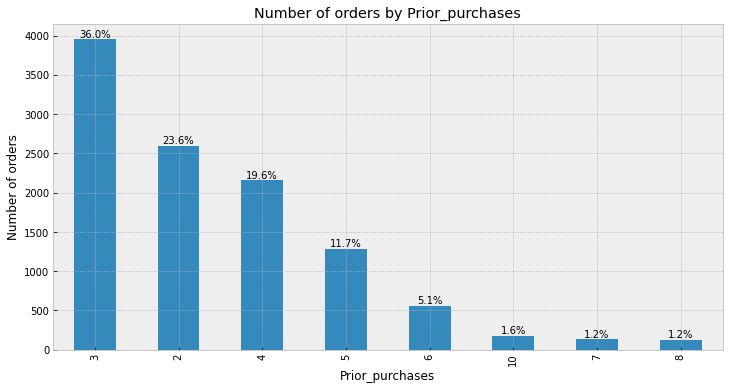

In [ ]:
column_exploration(df_ecommerce,'Prior_purchases')

COLUMN: Product_importance


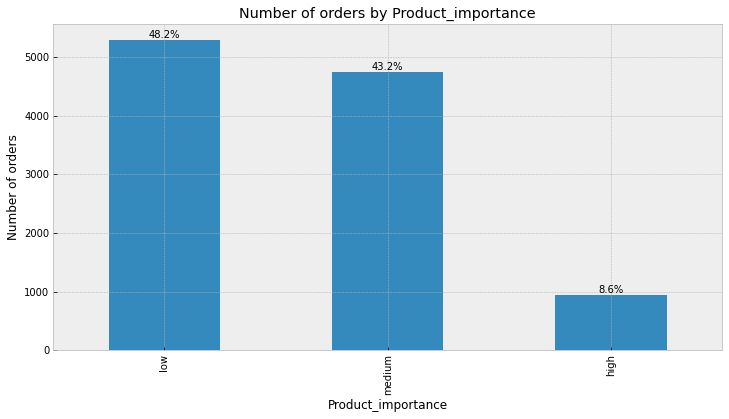

In [ ]:
column_exploration(df_ecommerce,'Product_importance')

COLUMN: Reached.on.Time_Y.N


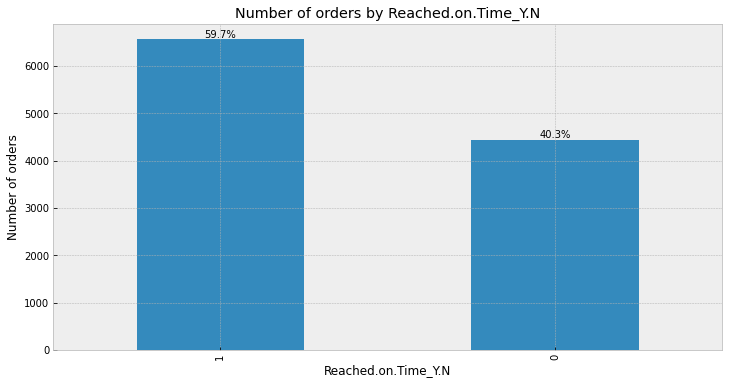

In [ ]:
column_exploration(df_ecommerce,'Reached.on.Time_Y.N')

# 5.4 - Análisis Bivariado

## 5.4.1 - Análisis Bivariado (ANALIZAMOS LAS INTERRELACIONES ENTRE VARIABLES NUMERICAS)

In [ ]:
Num_variables

['Customer_care_calls',
 'Cost_of_the_Product',
 'Discount_offered',
 'Weight_in_gms']

<Figure size 432x288 with 0 Axes>

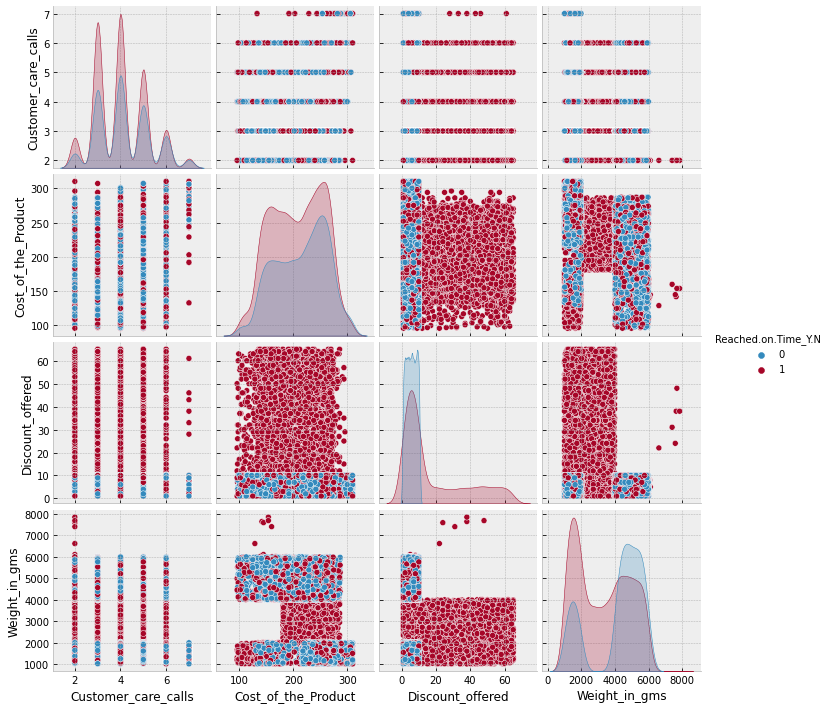

In [ ]:
plt.figure()

sns.pairplot(df_ecommerce[Num_OnTime_var]  ,hue = 'Reached.on.Time_Y.N', hue_order =[0, 1])#,palette = 'plasma')

plt.show()

## 5.5 - Análisis Multivariado

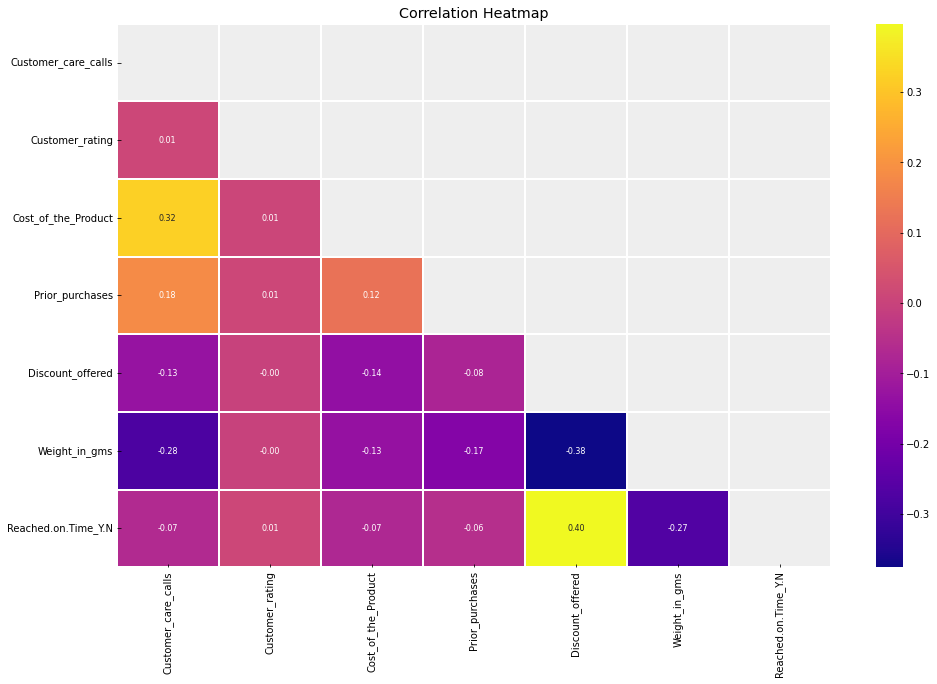

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
df_ = df_ecommerce.drop(['ID'],axis=1)

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df_.corr(),dtype = bool))
sns.heatmap(df_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(df_ecommerce):
    print(len(train_index))
    print(len(test_index))
df_ecommerce['Train'] = 0
df_ecommerce.loc[df_ecommerce.index.isin(train_index),'Train'] = 1

7699
3300


In [10]:
df_ecommerce[df_ecommerce['Train']==1].corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Train
ID,1.000000,0.185852,-0.010663,0.197423,0.143248,-0.602207,0.279565,-0.415410,NaN
Customer_care_calls,0.185852,1.000000,0.012519,0.316424,0.178238,-0.132909,-0.278104,-0.072821,NaN
...,...,...,...,...,...,...,...,...,...
Reached.on.Time_Y.N,-0.415410,-0.072821,0.015807,-0.069781,-0.052350,0.399134,-0.267764,1.000000,NaN
Train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
transformer = PowerTransformer()
transformer.fit(df_ecommerce.loc[df_ecommerce['Train'] == 1, Num_variables])
df_ecommerce[Num_variables] = transformer.transform(df_ecommerce[Num_variables])
df_ecommerce

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Train
0,1,D,Flight,0.035423,2,-0.702355,3,low,F,1.570618,-1.481483,1,1
1,2,F,Flight,0.035423,5,0.109135,2,low,M,1.775055,-0.309437,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,10998,F,Ship,0.859630,2,0.257256,6,medium,M,-1.274743,-1.496682,0,1
10998,10999,D,Ship,-2.089545,5,-1.148740,5,low,F,-0.171640,-1.216727,0,0


In [18]:
scaler = MinMaxScaler()
scaler.fit(df_ecommerce.loc[df_ecommerce['Train'] == 1, Num_variables])
df_ecommerce[Num_variables] = scaler.transform(df_ecommerce[Num_variables])
df_ecommerce

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Train
0,1,D,Flight,0.491231,2,0.358253,3,low,F,0.927887,0.037608,1,1
1,2,F,Flight,0.491231,5,0.540731,2,low,M,0.982691,0.322929,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,10998,F,Ship,0.681763,2,0.574039,6,medium,M,0.165124,0.033908,0,1
10998,10999,D,Ship,0.000000,5,0.257876,5,low,F,0.460835,0.102060,0,0


In [24]:
X = df_ecommerce.loc[df_ecommerce['Train'] == 1, Num_variables]
Y = df_ecommerce.loc[df_ecommerce['Train'] == 1, 'Cost_of_the_Product']

results_MI = mutual_info_regression(X = X, y = Y)
#results_MI = mutual_info_classif(X = X, y = Y)

tabla_MI = pd.DataFrame(data = results_MI, index = X.columns, columns = ['MI']).sort_values(by=['MI'], ascending=False)
tabla_MI

,MI
Cost_of_the_Product,5.179889
Weight_in_gms,0.163028
Customer_care_calls,0.145542
Discount_offered,0.022685


In [25]:
results_corr = df_ecommerce.corr(method = 'pearson').loc['Cost_of_the_Product']
tabla_corr = pd.DataFrame(data = np.array(results_corr), index = results_corr.index, columns = ['Corr']).sort_values(by=['Corr'], ascending=False)
tabla_corr

,Corr
Cost_of_the_Product,1.000000
Customer_care_calls,0.312492
...,...
Discount_offered,-0.125059
Weight_in_gms,-0.135521


In [16]:
warnings.filterwarnings("ignore")
ppscoreT = pps.matrix(df_ecommerce.loc[df_ecommerce['Train']==1])
tabla_pps = ppscoreT[ppscoreT['y'] == 'Cost_of_the_Product'].sort_values(by = ['ppscore'], ascending = False)
tabla_pps

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
70,Cost_of_the_Product,Cost_of_the_Product,1.000000,predict_itself,True,None,0.000000,1.000000,None
44,Customer_care_calls,Cost_of_the_Product,0.074337,regression,True,mean absolute error,0.192739,0.178411,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
135,Weight_in_gms,Cost_of_the_Product,0.000000,regression,True,mean absolute error,0.192739,0.235199,DecisionTreeRegressor()
161,Train,Cost_of_the_Product,0.000000,regression,True,mean absolute error,0.192739,0.192888,DecisionTreeRegressor()


In [22]:
X

,Customer_care_calls,Cost_of_the_Product,Discount_offered,Weight_in_gms
0,0.491231,0.358253,0.927887,0.037608
1,0.491231,0.540731,0.982691,0.322929
...,...,...,...,...
10996,0.681763,0.665226,0.350802,0.025036
10997,0.681763,0.574039,0.165124,0.033908


In [23]:
Y

0        0.358253
1        0.540731
           ...   
10996    0.665226
10997    0.574039
Name: Cost_of_the_Product, Length: 7699, dtype: float64

In [27]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [28]:
forward_selection(X,  Y)

['Cost_of_the_Product',
 'Discount_offered',
 'Customer_care_calls',
 'Weight_in_gms']

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
 

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.803650573051496e-16


In [32]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 5.04628877285074e-32


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

1.0


In [35]:
import statsmodels.api as sm
est = sm.Logit(y_train, X_train)
result = est.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.540722
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     Cost_of_the_Product   No. Observations:                 6159
Model:                           Logit   Df Residuals:                     6155
Method:                            MLE   Df Model:                            3
Date:                 Sun, 20 Nov 2022   Pseudo R-squ.:                  0.2156
Time:                         15:34:59   Log-Likelihood:                -3330.3
converged:                        True   LL-Null:                       -4245.4
Covariance Type:             nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Customer_care_calls    -1.0075      0.119     -8.474      0.000      -1.241      -

In [36]:
varSelected = ['Discount_offered','Customer_care_calls','Weight_in_gms']

In [37]:
X_train = df_ecommerce.loc[df_ecommerce['Train']==1, varSelected]
y_train = df_ecommerce.loc[df_ecommerce['Train']==1, 'Cost_of_the_Product']

X_test = df_ecommerce.loc[df_ecommerce['Train']==0, varSelected]
y_test = df_ecommerce.loc[df_ecommerce['Train']==0, 'Cost_of_the_Product']

In [40]:
model = dabl.SimpleRegressor()
model.fit(X_train, y_train)

Running DummyRegressor()
r2: -0.001 neg_mean_squared_error: -0.051
=== new best DummyRegressor() (using r2):
r2: -0.001 neg_mean_squared_error: -0.051

Running DecisionTreeRegressor(max_depth=1)
r2: 0.100 neg_mean_squared_error: -0.046
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.100 neg_mean_squared_error: -0.046

Running DecisionTreeRegressor(max_depth=5)
r2: 0.337 neg_mean_squared_error: -0.034
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.337 neg_mean_squared_error: -0.034

Running Ridge(alpha=10)
r2: 0.108 neg_mean_squared_error: -0.045
Running Lasso(alpha=10)
r2: -0.001 neg_mean_squared_error: -0.051

Best model:
DecisionTreeRegressor(max_depth=5)
Best Scores:
r2: 0.337 neg_mean_squared_error: -0.034


SimpleRegressor()

In [43]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [44]:
y_pred = model.predict(X_test)

In [45]:
df_ecommerce_pred = df_ecommerce.loc[df_ecommerce['Train']==0]
df_ecommerce_pred.loc[:,'Predicciones'] = y_pred

In [46]:
df_ecommerce_pred

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Train,Predicciones
9,10,B,Flight,0.269174,2,0.298697,3,medium,F,0.843676,0.030202,1,0,0.248625
15,16,B,Flight,0.491231,3,0.593143,3,low,F,0.932214,0.265918,1,0,0.589030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10990,10991,C,Ship,0.681763,4,0.554986,6,low,M,0.272585,0.015804,0,0,0.665008
10998,10999,D,Ship,0.000000,5,0.257876,5,low,F,0.460835,0.102060,0,0,0.346788


In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)


In [58]:
df_ecommerce_pred = df_ecommerce.loc[df_ecommerce['Train']==0]
df_ecommerce_pred.loc[:,'Predicciones'] = y_pred

In [59]:
df_ecommerce_pred

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Train,Predicciones
9,10,B,Flight,0.269174,2,0.298697,3,medium,F,0.843676,0.030202,1,0,0.462529
15,16,B,Flight,0.491231,3,0.593143,3,low,F,0.932214,0.265918,1,0,0.487006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10990,10991,C,Ship,0.681763,4,0.554986,6,low,M,0.272585,0.015804,0,0,0.629278
10998,10999,D,Ship,0.000000,5,0.257876,5,low,F,0.460835,0.102060,0,0,0.426316
